# Ex1 - Multivariate Gaussian's (Question 2.1)
---

Handle imports, using the 3d_gaussian.py helper file (renamed to gausssian_helper)

In [86]:
import gausssian_helper
import numpy as np
import matplotlib.pyplot as plt

# make prints a little easier to read
np.set_printoptions(precision=2 )
np.set_printoptions(suppress=True)

### Data generation
11. Generate random points with normal divergence,
mean of zero and variance of one.
<br/>
(Generating 1500 data points for each axis)
<br/>

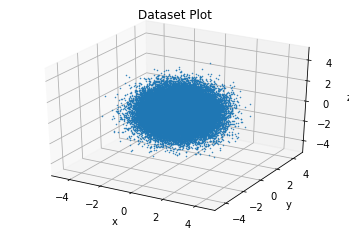

In [87]:
SIZE = 50000
DIM = 3
X = 0
Y = 1
Z = 2

cov_matrix = np.eye(DIM)
data = np.random.multivariate_normal(np.zeros(DIM), cov_matrix, SIZE).T

# plot the dataset for visualization
gausssian_helper.plot_3d(data, "Dataset Plot")

looking at the covariance matrix of the samples:


In [88]:
print("Analytical covariance matrix:")
print(cov_matrix)

print()
print("Numerical covariance matrix:")
print(np.cov(data))

Analytical covariance matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Numerical covariance matrix:
[[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]


we can deduce the dataset is of uncorrelated variables with identical variance
(there are roughly zero values off diagonal, and roughly one for the values on the diagonal).

### Scaling transformation
Transform the data with the following scaling matrix: S = diag(.1,.5,2), Plot the new points. What does the covariance matrix look like now (both analytically and
numerically)?


transformation: 
[[0.1 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  2. ]]



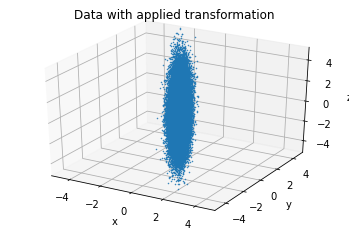

In [89]:
# create the required scaling matrix
s = np.diag([.1,.5,2])
print("transformation: ")
print(s)
print()

# apply the transformation
data = s @ data

# plot
gausssian_helper.plot_3d(data, "Data with applied stretching transformation")

Now looking at the covariance matrix:

In [90]:
print("Analytical covariance matrix:")
cov_matrix = s @ cov_matrix @ s.T
print(cov_matrix)

print()
print("Numerical covariance matrix:")
print(np.cov(data))

Analytical covariance matrix:
[[0.01 0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   4.  ]]

Numerical covariance matrix:
[[ 0.01 -0.    0.  ]
 [-0.    0.25  0.  ]
 [ 0.    0.    4.  ]]


We can notice that the data point of the X and Y axis compacted while the Z axes
stretched. as the scaling matrix is diagonal, the X,Y and Z axis scaling is uncorrelated, since the
off diagonal elements of the variance matrix are in fact roughly zero.
We can also tell how closely the analytical and numerical calculations of the covariance matrix is
thanks to the size of the dataset.

### Rotation transformation
13. Multiply the scaled data by random orthogonal matrix. Plot the new points. What does the
covariance matrix look like now?

Rotation matrix:
[[-0.33  0.02 -0.95]
 [-0.75 -0.61  0.25]
 [-0.57  0.79  0.21]]



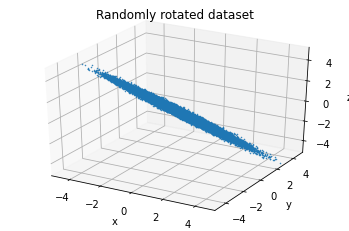

In [91]:
# generate a random orthogonal matrix
r = gausssian_helper.get_orthogonal_matrix(3)
print("Rotation matrix:")
print(r)
print()

# apply the transformation
data = r @ data

# plot
gausssian_helper.plot_3d(data, "Randomly rotated dataset")

next, having a look at the new samples' variance matrix:

In [92]:
print("Analytical covariance matrix:")
print(r @ cov_matrix @ r.T)

print()
print("Numerical covariance matrix:")
print(np.cov(data))

Analytical covariance matrix:
[[ 3.57 -0.94 -0.8 ]
 [-0.94  0.35  0.09]
 [-0.8   0.09  0.34]]

Numerical covariance matrix:
[[ 3.57 -0.94 -0.8 ]
 [-0.94  0.34  0.1 ]
 [-0.8   0.1   0.34]]


We note, as expected, that the orthogonal transformation in fact preformed just a
<b>rotation</b> of the dataset without stretching it.
Yet we do notice the covariance matrix indicate there is some correlation
between the 3 axis.

### Projection for marginal distribution of a gaussian
14. In recitation, we claimed that the marginal distribution of a gaussian is still gaussian. Plot the
projection of the data to the x, y axes. What does it look like? Add the plot to the submission.

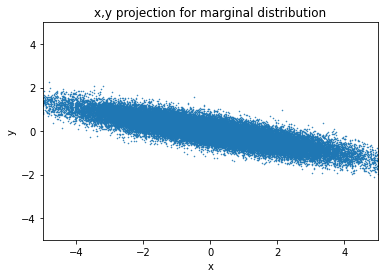

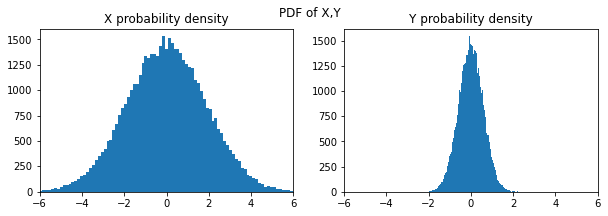

In [93]:
# x,y projection for original data
gausssian_helper.plot_2d(data, "x,y projection for marginal distribution")

fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].hist(data[X], bins='auto')
axs[0].set_title("X probability density")
axs[0].set_xlim(-6,6)
axs[1].hist(data[Y], bins='auto')
axs[1].set_title("Y probability density")
axs[1].set_xlim(-6,6)
fig.suptitle("PDF of X,Y")
plt.show()

as expected, the marginal distribution of the data clearly resembles the normal distribution for both
the X and Y axis, and as such seems to indeed be a gaussian,
although it is slightly stretched across the X axis and shrunk across the Y axis, which is to
be expected considering the scaling matrix we have applied to the data.

### Projection for conditional distribution of a gaussian
15. In recitation, we claimed that the conditional distribution of a gaussian is still gaussian. Only
for points where 0.1 > z > −0.4: Plot the projection of the points to the x, y axes. What does
it look like? Add the plot to the submission

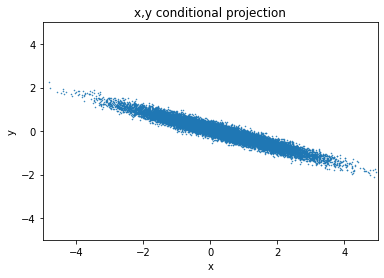

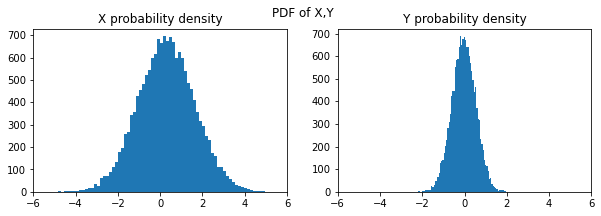

In [95]:
Z_MIN = -.4
Z_MAX = .1

# get the relevant data points from the dataset
conditional_points = np.reshape(data[:,np.where(np.logical_and(Z_MIN < data[Z], data[Z] < Z_MAX))], (3,-1))

# x,y conditional projection
gausssian_helper.plot_2d(conditional_points, "x,y conditional projection")

fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].hist(conditional_points[X], bins='auto')
axs[0].set_title("X probability density")
axs[0].set_xlim(-6,6)
axs[1].hist(conditional_points[Y], bins='auto')
axs[1].set_title("Y probability density")
axs[1].set_xlim(-6,6)
fig.suptitle("PDF of X,Y")
plt.show()

as expected, the conditional distribution of the data clearly resembles the normal distribution for both
the X and Y axis, and as such seems to indeed be a gaussian,
although it is slightly stretched across the X axis and shrunk across the Y axis, which is to
be expected considering the scaling matrix we have applied to the data.